In [25]:
import pandas as pd
import geopandas as gpd
from eomaps import Maps
import folium
import matplotlib.pyplot as plt

#### Dados de entrada

In [26]:

contorno = gpd.read_file("shp/batimetria/GEBCO_SA_bath_contours.shp")
contorno = contorno.set_crs(epsg = "4326", inplace = True, allow_override = True)
PR3 = pd.read_excel("inputs/Ldagua.xlsx",header = 0 ,usecols = ['Nome','LATITUDE_BASE_DD','LONGITUDE_BASE_DD'] )

#### Transforma em um geodataframe

In [27]:

PR3 = gpd.GeoDataFrame(PR3,
            geometry = 
            gpd.points_from_xy(x=PR3.LONGITUDE_BASE_DD, y=PR3.LATITUDE_BASE_DD),
            crs = "EPSG:4326"
            )

print(contorno)
print(PR3)

        ID  DEPTH                                           geometry
0    46670 -100.0  MULTILINESTRING ((-43.15551 -22.94563, -43.155...
1    46671 -100.0  MULTILINESTRING ((-43.16387 -22.94816, -43.163...
2    46688 -100.0  LINESTRING (-44.27971 -23.02734, -44.28125 -23...
3    46692 -100.0  MULTILINESTRING ((-44.34944 -23.03865, -44.347...
4    46694 -100.0  MULTILINESTRING ((-44.25208 -23.04542, -44.249...
..     ...    ...                                                ...
687  16667 -750.0  LINESTRING (-46.78093 -27.28958, -46.78125 -27...
688  16668 -750.0  LINESTRING (-46.87292 -27.29524, -46.87148 -27...
689  16681 -750.0  LINESTRING (-46.86024 -27.36042, -46.86042 -27...
690  16683 -750.0  LINESTRING (-46.87187 -27.37292, -46.87292 -27...
691  19733 -750.0  MULTILINESTRING ((-45.00000 -25.55473, -45.000...

[692 rows x 3 columns]
                    Nome  LATITUDE_BASE_DD  LONGITUDE_BASE_DD  \
0   1-BRSA-132-ALS              -10.304946         -36.051198   
1   1-BRSA-464D-AL

In [28]:
# Processamento
m = Maps(crs=Maps.CRS.Mercator.GOOGLE)
m.set_extent((-72.0, -30.0, -35.0, -5.0))

In [29]:
# Batimetria
m.add_gdf(contorno, column="DEPTH", legend=True)

In [30]:
# Adiciona os poços como uma nova camada do mapa
m.add_gdf(PR3, fc="r", ec="b", lw=3, legend=True)

In [31]:
#ESRI
m.add_wms.ESRI_ArcGIS.SERVICES.World_Imagery.add_layer.xyz_layer()

EOmaps: ... fetching services for 'ERSI_ArcGIS_REST'
EOmaps: done!
World_Imagery
EOmaps: ... adding wms-layer xyz_layer


In [32]:
#Adiciona norte e escala
m.add_scalebar()
m.add_compass()

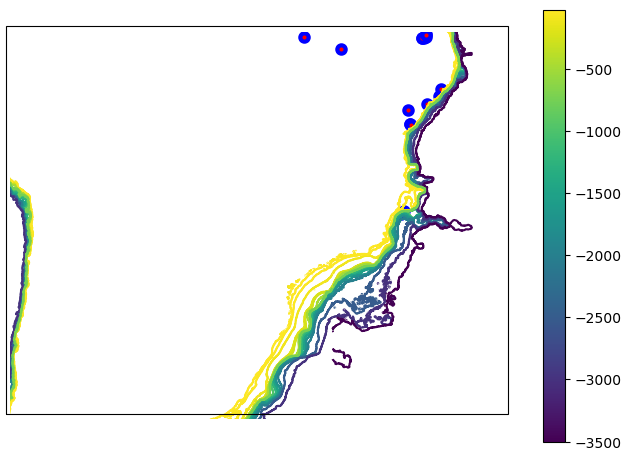

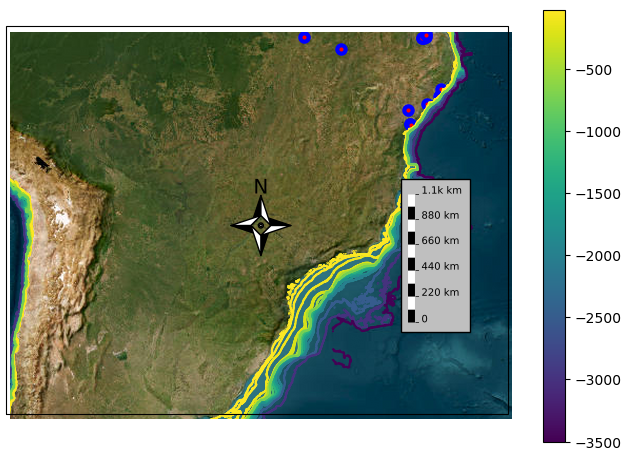

In [33]:
#saída
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()